<a href="https://colab.research.google.com/github/chasubeen/python_selfstudy/blob/master/%E1%84%92%E1%85%A9%E1%86%AB%E1%84%8C%E1%85%A1%20%E1%84%80%E1%85%A9%E1%86%BC%E1%84%87%E1%85%AE%E1%84%92%E1%85%A1%E1%84%82%E1%85%B3%E1%86%AB%20%E1%84%86%E1%85%A5%E1%84%89%E1%85%B5%E1%86%AB%E1%84%85%E1%85%A5%E1%84%82%E1%85%B5%E1%86%BC%2B%E1%84%83%E1%85%B5%E1%86%B8%E1%84%85%E1%85%A5%E1%84%82%E1%85%B5%E1%86%BC%20%E1%84%89%E1%85%B5%E1%86%AF%E1%84%89%E1%85%B3%E1%86%B8/8-2.%20%ED%95%A9%EC%84%B1%EA%B3%B1%20%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%9D%84%20%EC%82%AC%EC%9A%A9%ED%95%9C%20%EC%9D%B4%EB%AF%B8%EC%A7%80%20%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**패션 MNIST 데이터 불러오기**

In [ ]:
# 데이터를 불러오고 전처리하기

from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1,28,28,1) / 255.0 # 데이터 스케일을 0 ~ 1 사이로 바꾸기
                                                       # 입력 이미지는 항상 깊이 차원이 있어야 함 
train_scaled,val_scaled,train_target,val_target = train_test_split(
    train_scaled,train_target,test_size = 0.2,random_state = 42
)

4431872/4422102 [==============================] - 0s 0us/step


###**합성곱 신경망 만들기**

In [ ]:
# 모델 객체 생성 & 합성곱 층 추가
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size = 3,activation = 'relu',padding = 'same',input_shape = (28,28,1)))

In [ ]:
# 풀링 층 추가하기
model.add(keras.layers.MaxPooling2D(2))

In [ ]:
# 합성곱 - 풀링 층 추가하기
model.add(keras.layers.Conv2D(64,kernel_size = 3,activation = 'relu',padding = 'same'))
model.add(keras.layers.MaxPooling2D(2))

In [ ]:
# 여러 층을 추가하기
model.add(keras.layers.Flatten()) # 3차원 특성 맵을 일렬로 펼치기 -> 마지막에 출력층애서 확률 계산 위함
model.add(keras.layers.Dense(100,activation = 'relu')) # 밀집층 추가
model.add(keras.layers.Dropout(0.4)) # 은닉층의 과대적합 방지
model.add(keras.layers.Dense(10,activation = 'softmax')) # 확률 계산하기(출력층)

In [ ]:
# 모델 구조 출력
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)              

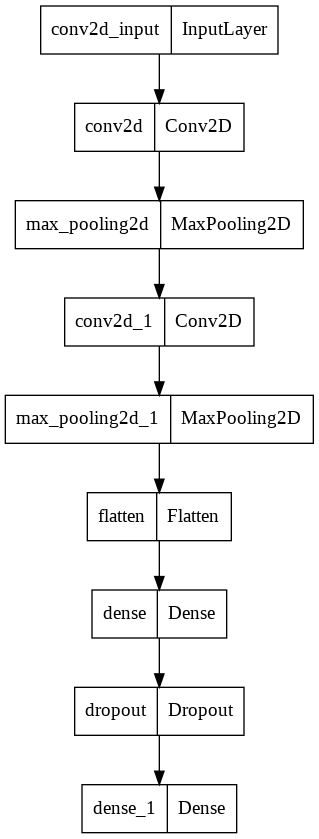

In [ ]:
# 층의 구성을 그림으로 파악하기
keras.utils.plot_model(model)

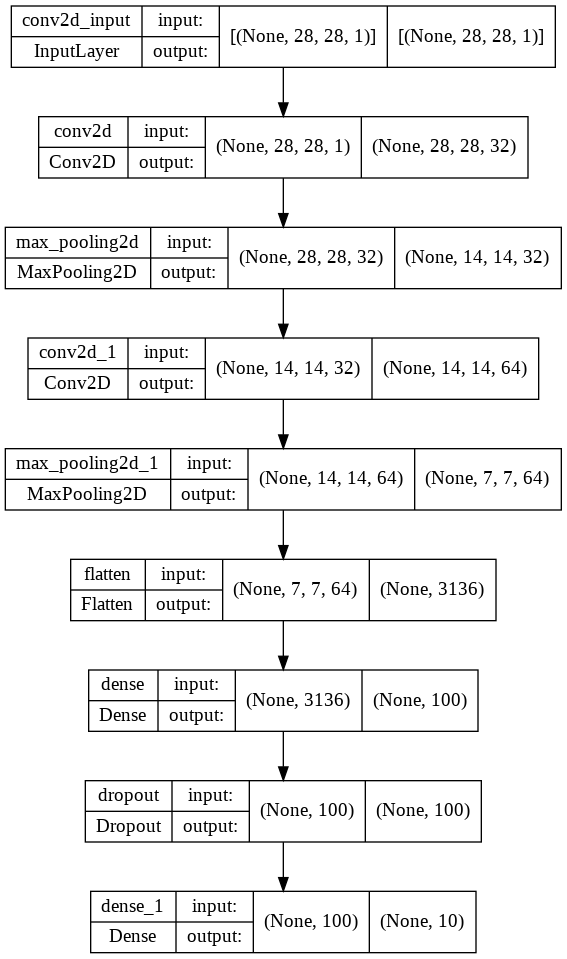

In [ ]:
# 입력과 출력의 크기도 함께 파악하기
keras.utils.plot_model(model,show_shapes = True)

###**모델 컴파일과 훈련**

In [ ]:
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = 'accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5',save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2,restore_best_weights=True)
history = model.fit(train_scaled,train_target,epochs = 20,validation_data = (val_scaled,val_target),callbacks = [checkpoint_cb,early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 93s 62ms/step - loss: 0.5098 - accuracy: 0.8182 - val_loss: 0.3252 - val_accuracy: 0.8817
Epoch 2/20
1500/1500 [==============================] - 65s 43ms/step - loss: 0.3388 - accuracy: 0.8769 - val_loss: 0.2978 - val_accuracy: 0.8891
Epoch 3/20
1500/1500 [==============================] - 64s 43ms/step - loss: 0.2905 - accuracy: 0.8943 - val_loss: 0.2473 - val_accuracy: 0.9079
Epoch 4/20
1500/1500 [==============================] - 65s 43ms/step - loss: 0.2563 - accuracy: 0.9061 - val_loss: 0.2508 - val_accuracy: 0.9079
Epoch 5/20
1500/1500 [==============================] - 64s 43ms/step - loss: 0.2350 - accuracy: 0.9139 - val_loss: 0.2319 - val_accuracy: 0.9149
Epoch 6/20
1500/1500 [==============================] - 63s 42ms/step - loss: 0.2166 - accuracy: 0.9189 - val_loss: 0.2268 - val_accuracy: 0.9184
Epoch 7/20
1500/1500 [==============================] - 65s 43ms/step - loss: 0.1974 - accuracy: 0.9263 - val_loss: 0.2247 -

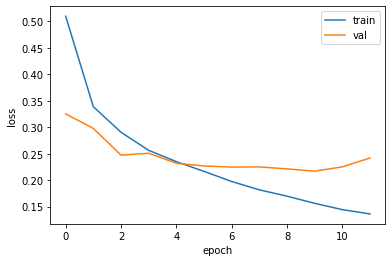

In [ ]:
# 손실 그래프를 그려 조기 종료 양상 파악하기
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [ ]:
# 세트에 대한 성능 평가하기
model.evaluate(val_scaled,val_target)

# fit() 메서드의 10번째 epoch의 출력과 동일 -> 12번째 epoch에서 early_stopping이 적용됨

375/375 [==============================] - 7s 18ms/step - loss: 0.2169 - accuracy: 0.9243


[0.21694043278694153, 0.9242500066757202]

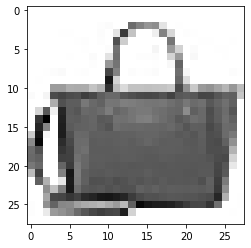

In [ ]:
# 훈련된 모델을 사용하여 새로운 데이터에 대한 예측 만들기
plt.imshow(val_scaled[0].reshape(28,28),cmap = 'gray_r') # matplotlib에서는 흑백 이미지에 깊이 차원이 x -> 없애주기
plt.show()

In [ ]:
# 이미지에 대한 예측 확인하기
preds = model.predict(val_scaled[0:1])
print(preds)

[[1.9930091e-19 3.9797066e-27 1.7542787e-22 3.9023529e-23 1.7207745e-22
  4.5138197e-25 1.4378289e-19 2.4229151e-23 1.0000000e+00 8.7549121e-26]]


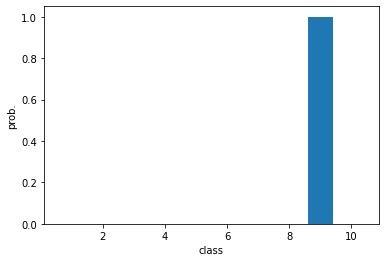

In [ ]:
plt.bar(range(1,11),preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

# 9번째 클래스에 해당하는 그림이라고 주장하고 있음

In [ ]:
# 아홉 번째 클래스가 실제로 무엇인지 확인하기

# 레이블 저장
classes = ['티셔츠','바지','스웨터','드레스','코트','샌달','셔츠','스니커즈','가방','앵클 부츠']

In [ ]:
# preds 배열에서 가장 큰 인덱스를 찾아 classes 리스트의 인덱스로 사용하기
import numpy as np
print(classes[np.argmax(preds)])

가방


In [ ]:
# 테스트 세트로 합성곱 신경망의 일반화 성능 파악하기
test_scaled = test_input.reshape(-1,28,28,1)/255.0

In [ ]:
model.evaluate(test_scaled,test_target)

313/313 [==============================] - 7s 20ms/step - loss: 0.2432 - accuracy: 0.9164


[0.24317339062690735, 0.9164000153541565]